### 폰트 설치

In [87]:
!sudo apt install fonts-nanum

In [4]:
import os
import matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from os.path import join as pjoin

### 그래프 한글 깨짐 해결 코드

In [2]:
matplotlib.font_manager._rebuild()
matplotlib.rcParams['font.family'] ='NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [5]:
ROOT_PATH = os.path.abspath("..")

DATA = pjoin(ROOT_PATH, "data")
RAW_DATA = pjoin(DATA, "raw")
PROC_DATA = pjoin(DATA, "proc")

## 2015 ~ 2020 어류 데이터 정리

In [9]:
fish = pd.read_csv(pjoin(RAW_DATA, '수원시데이터_어류_2005_2020_전국.csv'), encoding='CP949')
fish

,한글과명,한글보통명,조사연도,개체수
0,잉어과,큰납지리,2016,1
1,가물치과,가물치,2020,1
2,망둑어과,밀어,2015,3
3,망둑어과,문절망둑,2009,1
4,잉어과,큰납지리,2020,1
...,...,...,...,...
2628,잉어과,피라미,2014,8
2629,미꾸리과,미꾸리,2005,2
2630,미꾸리과,미꾸리,2016,2
2631,동사리과,얼록동사리,2020,1


In [24]:
def get_dataset_by_year(data, year):
    data = data[data['조사연도'] == year][['한글보통명']].sort_values(by=['한글보통명'])
    data = data.drop_duplicates(['한글보통명'], ignore_index=True)

    result = pd.DataFrame()
    result[f'{year}'] = data['한글보통명']
    result = result.reset_index(drop=True)
    return result

In [55]:
fish_2015 = get_dataset_by_year(fish, 2015)
fish_2016 = get_dataset_by_year(fish, 2016)
fish_2017 = get_dataset_by_year(fish, 2017)
fish_2018 = get_dataset_by_year(fish, 2018)
fish_2019 = get_dataset_by_year(fish, 2019)
fish_2020 = get_dataset_by_year(fish, 2020)

In [56]:
fish_2020

,2020
0,가물치
1,각시붕어
2,갈문망둑
3,구피
4,꾹저구
5,대륙송사리
6,돌고기
7,드렁허리
8,떡납줄갱이
9,떡붕어


## 서로 다른 데이터 합치기

In [57]:
fish_by_year = pd.concat([fish_2015, fish_2016, fish_2017, fish_2018, fish_2019, fish_2020], axis=1)
fish_by_year

,2015,2016,2017,2018,2019,2020
0,가물치,가물치,가물치,가물치,가물치,가물치
1,각시붕어,각시붕어,각시붕어,각시붕어,각시붕어,각시붕어
2,대륙송사리,구피,갈문망둑,갈문망둑,갈문망둑,갈문망둑
3,돌고기,대륙송사리,구피,꾹저구,구피,구피
4,동자개,돌고기,꾹저구,대륙송사리,꾹저구,꾹저구
5,떡붕어,동자개,대륙송사리,돌고기,돌고기,대륙송사리
6,메기,떡붕어,돌고기,떡납줄갱이,동자개,돌고기
7,미꾸라지,메기,동자개,떡붕어,떡붕어,드렁허리
8,미꾸리,몰개,드렁허리,메기,메기,떡납줄갱이
9,밀어,미꾸라지,떡붕어,모래무지,모래무지,떡붕어


## 2015 ~ 2020 연속해서 관측되는 데이터 확인

In [58]:
nfish_2015_by_year = fish[fish['조사연도'] == 2015].groupby(by=['한글보통명', '조사연도'], as_index=False).sum()
fish_2015 = pd.merge(fish_2015, nfish_2015_by_year, left_on='2015', right_on='한글보통명')[['2015', '개체수']]

nfish_2016_by_year = fish[fish['조사연도'] == 2016].groupby(by=['한글보통명', '조사연도'], as_index=False).sum()
fish_2016 = pd.merge(fish_2016, nfish_2016_by_year, left_on='2016', right_on='한글보통명')[['2016', '개체수']]

nfish_2017_by_year = fish[fish['조사연도'] == 2017].groupby(by=['한글보통명', '조사연도'], as_index=False).sum()
fish_2017 = pd.merge(fish_2017, nfish_2017_by_year, left_on='2017', right_on='한글보통명')[['2017', '개체수']]

nfish_2018_by_year = fish[fish['조사연도'] == 2018].groupby(by=['한글보통명', '조사연도'], as_index=False).sum()
fish_2018 = pd.merge(fish_2018, nfish_2018_by_year, left_on='2018', right_on='한글보통명')[['2018', '개체수']]

nfish_2019_by_year = fish[fish['조사연도'] == 2019].groupby(by=['한글보통명', '조사연도'], as_index=False).sum()
fish_2019 = pd.merge(fish_2019, nfish_2019_by_year, left_on='2019', right_on='한글보통명')[['2019', '개체수']]

nfish_2020_by_year = fish[fish['조사연도'] == 2020].groupby(by=['한글보통명', '조사연도'], as_index=False).sum()
fish_2020 = pd.merge(fish_2020, nfish_2020_by_year, left_on='2020', right_on='한글보통명')[['2020', '개체수']]


In [59]:
fish_2020

,2020,개체수
0,가물치,5
1,각시붕어,14
2,갈문망둑,13
3,구피,5
4,꾹저구,7
5,대륙송사리,1
6,돌고기,14
7,드렁허리,1
8,떡납줄갱이,1
9,떡붕어,9


In [60]:
fish_2015.rename(columns={'개체수' : '개수_2015'}, inplace=True)
fish_2016.rename(columns={'개체수' : '개수_2016'}, inplace=True)
fish_2017.rename(columns={'개체수' : '개수_2017'}, inplace=True)
fish_2018.rename(columns={'개체수' : '개수_2018'}, inplace=True)
fish_2019.rename(columns={'개체수' : '개수_2019'}, inplace=True)
fish_2020.rename(columns={'개체수' : '개수_2020'}, inplace=True)

In [62]:
fish

,한글과명,한글보통명,조사연도,개체수
0,잉어과,큰납지리,2016,1
1,가물치과,가물치,2020,1
2,망둑어과,밀어,2015,3
3,망둑어과,문절망둑,2009,1
4,잉어과,큰납지리,2020,1
...,...,...,...,...
2628,잉어과,피라미,2014,8
2629,미꾸리과,미꾸리,2005,2
2630,미꾸리과,미꾸리,2016,2
2631,동사리과,얼록동사리,2020,1


In [70]:
entire_fish_names = fish['한글보통명'].unique()

data = pd.DataFrame()
data['분류명'] = entire_fish_names

for y, f_year in zip(range(2015, 2021), [fish_2015, fish_2016, fish_2017, fish_2018, fish_2019, fish_2020]):
    data = pd.merge(left=data, right=f_year, left_on='분류명', right_on=f'{y}')

data

,분류명,2015,개수_2015,2016,개수_2016,2017,개수_2017,2018,개수_2018,2019,개수_2019,2020,개수_2020
0,가물치,가물치,4,가물치,2,가물치,2,가물치,3,가물치,1,가물치,5
1,밀어,밀어,136,밀어,84,밀어,85,밀어,66,밀어,36,밀어,49
2,붕어,붕어,441,붕어,313,붕어,83,붕어,233,붕어,200,붕어,134
3,떡붕어,떡붕어,9,떡붕어,22,떡붕어,4,떡붕어,16,떡붕어,2,떡붕어,9
4,잉어,잉어,96,잉어,56,잉어,47,잉어,62,잉어,36,잉어,50
5,블루길,블루길,1,블루길,30,블루길,16,블루길,11,블루길,6,블루길,24
6,배스,배스,36,배스,45,배스,24,배스,43,배스,28,배스,65
7,미꾸리,미꾸리,4,미꾸리,14,미꾸리,12,미꾸리,9,미꾸리,14,미꾸리,14
8,미꾸라지,미꾸라지,6,미꾸라지,1,미꾸라지,1,미꾸라지,5,미꾸라지,3,미꾸라지,2
9,얼록동사리,얼록동사리,20,얼록동사리,33,얼록동사리,34,얼록동사리,39,얼록동사리,36,얼록동사리,52


## 각 년도별 데이터 비율 구하기

In [71]:
print(f"2015년 관측된 개체 수: {data['개수_2015'].sum()}")
print(f"2016년 관측된 개체 수: {data['개수_2016'].sum()}")
print(f"2017년 관측된 개체 수: {data['개수_2017'].sum()}")
print(f"2018년 관측된 개체 수: {data['개수_2018'].sum()}")
print(f"2019년 관측된 개체 수: {data['개수_2019'].sum()}")
print(f"2020년 관측된 개체 수: {data['개수_2020'].sum()}")

2015년 관측된 개체 수: 1096
2016년 관측된 개체 수: 877
2017년 관측된 개체 수: 567
2018년 관측된 개체 수: 786
2019년 관측된 개체 수: 962
2020년 관측된 개체 수: 943


In [73]:
sum_of_2015 = data['개수_2015'].sum()
sum_of_2016 = data['개수_2016'].sum()
sum_of_2017 = data['개수_2017'].sum()
sum_of_2018 = data['개수_2018'].sum()
sum_of_2019 = data['개수_2019'].sum()
sum_of_2020 = data['개수_2020'].sum()

In [74]:
data['개수_2015'] = data['개수_2015'].apply(lambda x: x / sum_of_2015)
data['개수_2016'] = data['개수_2016'].apply(lambda x: x / sum_of_2016)

data['개수_2017'] = data['개수_2017'].apply(lambda x: x / sum_of_2017)
data['개수_2018'] = data['개수_2018'].apply(lambda x: x / sum_of_2018)


data['개수_2019'] = data['개수_2019'].apply(lambda x: x / sum_of_2019)
data['개수_2020'] = data['개수_2020'].apply(lambda x: x / sum_of_2020)

In [75]:
data

,분류명,2015,개수_2015,2016,개수_2016,2017,개수_2017,2018,개수_2018,2019,개수_2019,2020,개수_2020
0,가물치,가물치,0.003650,가물치,0.002281,가물치,0.003527,가물치,0.003817,가물치,0.001040,가물치,0.005302
1,밀어,밀어,0.124088,밀어,0.095781,밀어,0.149912,밀어,0.083969,밀어,0.037422,밀어,0.051962
2,붕어,붕어,0.402372,붕어,0.356899,붕어,0.146384,붕어,0.296438,붕어,0.207900,붕어,0.142100
3,떡붕어,떡붕어,0.008212,떡붕어,0.025086,떡붕어,0.007055,떡붕어,0.020356,떡붕어,0.002079,떡붕어,0.009544
4,잉어,잉어,0.087591,잉어,0.063854,잉어,0.082892,잉어,0.078880,잉어,0.037422,잉어,0.053022
5,블루길,블루길,0.000912,블루길,0.034208,블루길,0.028219,블루길,0.013995,블루길,0.006237,블루길,0.025451
6,배스,배스,0.032847,배스,0.051311,배스,0.042328,배스,0.054707,배스,0.029106,배스,0.068929
7,미꾸리,미꾸리,0.003650,미꾸리,0.015964,미꾸리,0.021164,미꾸리,0.011450,미꾸리,0.014553,미꾸리,0.014846
8,미꾸라지,미꾸라지,0.005474,미꾸라지,0.001140,미꾸라지,0.001764,미꾸라지,0.006361,미꾸라지,0.003119,미꾸라지,0.002121
9,얼록동사리,얼록동사리,0.018248,얼록동사리,0.037628,얼록동사리,0.059965,얼록동사리,0.049618,얼록동사리,0.037422,얼록동사리,0.055143


## 데이터 시각화

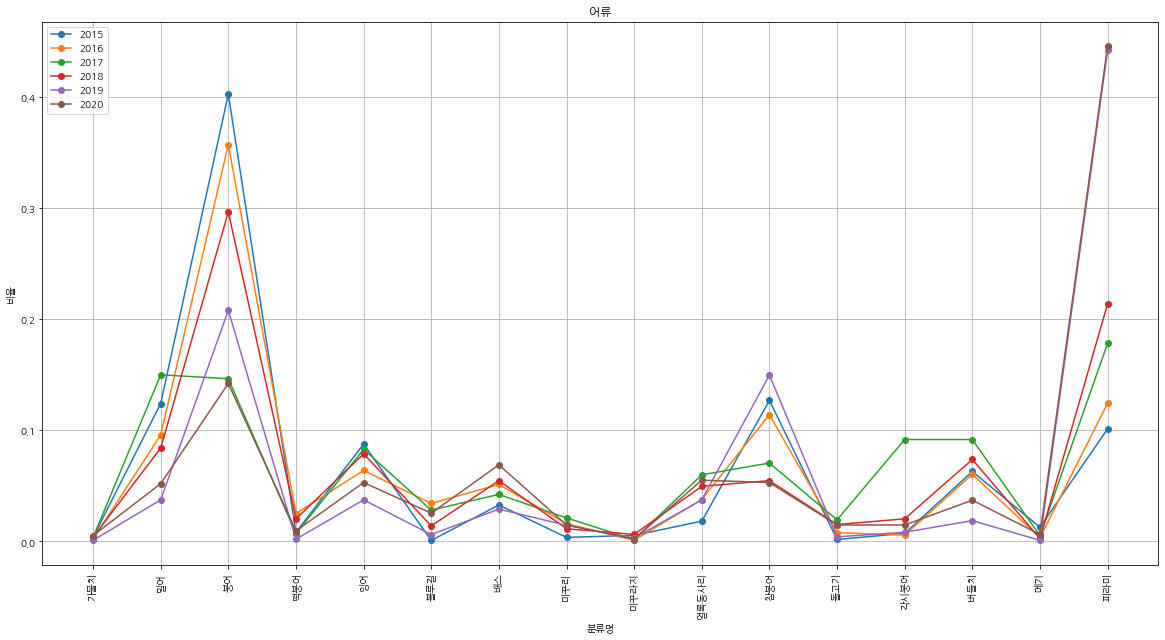

In [77]:
plt.figure(figsize=(20,10)) # 그래프 크기 조정 default size는 (6.4,4.4)

plt.plot('분류명', '개수_2015', 'o-', data = data, label = '2015')

plt.plot('분류명', '개수_2016', 'o-', data = data, label = '2016')
plt.plot('분류명', '개수_2017', 'o-', data = data, label = '2017')
plt.plot('분류명', '개수_2018', 'o-', data = data, label = '2018')
plt.plot('분류명', '개수_2019', 'o-', data = data, label = '2019')

plt.plot('분류명', '개수_2020', 'o-', data = data, label = '2020')

plt.xlabel('분류명')
plt.xticks(rotation=90)
plt.ylabel('비율')
plt.title('어류')

plt.legend()
plt.grid()
plt.show()

In [78]:
data.drop(columns=['2015', '2016', '2017', '2018', '2019', '2020'], inplace=True)
data.rename(columns={'개수_2015' : '2015',
                    '개수_2016' : '2016',
                    '개수_2017' : '2017', 
                    '개수_2018' : '2018',
                    '개수_2019' : '2019',
                    '개수_2020' : '2020',}, inplace=True)

## 데이터 저장

In [79]:
data.to_csv(pjoin(PROC_DATA, '수원시_연도별_어류(scaled).csv'), index=False) 